In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv',index_col = 'PassengerId')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv',index_col = 'PassengerId')

In [3]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns # dùng để dự đoán Survied

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

**Noted**

* **Ticket** #offSibling/ spuses aboard the Titanic
* **Ticket** of parents/childrent aboard the Titanic
* **Ticket**: ticket Number
* **Embarked:** cabin number
* **Embarked:** Port of Embarkation :C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# **Feature Classification: Categorical vs Numerical**


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Noted:**

* **Various Data:** Survived(binary), Pclass(Ordinal), Sex(Nominal), SibSp, Parch,Embarked(Nominal)
* **Various Data:** (continues): Age,Fare(discrete)
* **Various Data:** ticket, Cabin
* **Various Data:** Cabin > Age > Embarked
* **Various Data:** string, int , float

In [7]:
train_df['Survived'] = train_df['Survived'].astype('category')
converted_feature = ['Pclass','Sex','SibSp','Parch','Embarked']
def converted_categ(df,features):
  for feature in features:
    df[feature] = df[feature].astype('category')
  return df
train_df = converted_categ(train_df,converted_feature)
test_df = converted_categ(test_df,converted_feature)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


In [10]:
train_df.describe() #for numerical

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [11]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


**Nhận xét**

* Có 549 người chết
* class 3 chiếm khoảng 50%
* Nữ chiếm khoảng 60%
* Số lượng người đi một mình chiếm đa số
* ....

# EDA (Exploratory Data Analysis)







In [12]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [13]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


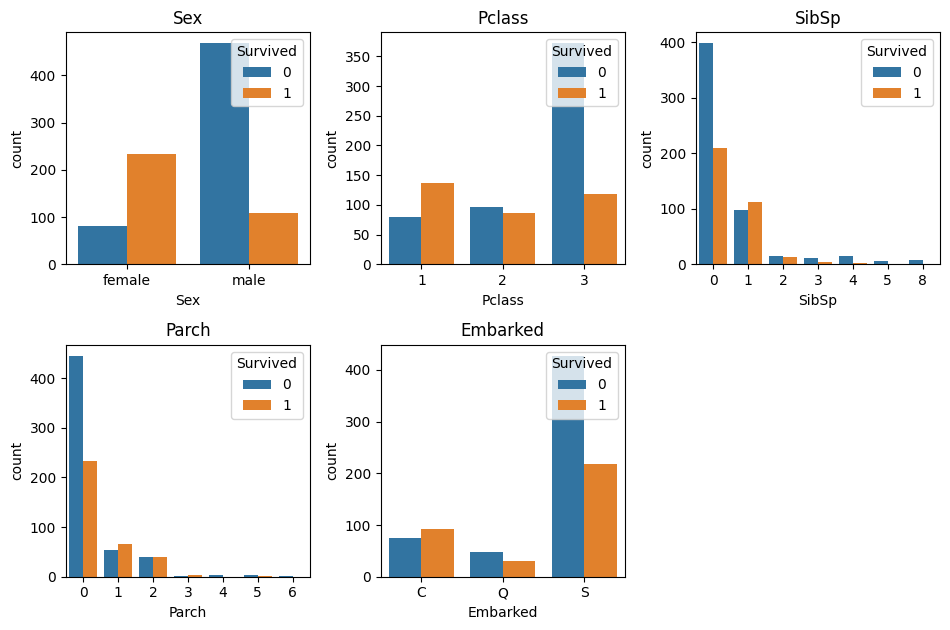

In [15]:
cols = ['Sex','Pclass','SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))
for r in range(n_rows):
  for c in range(n_cols):
    i = r*n_cols + c
    if i < len(cols):
      ax_i = axs[r,c]
      sns.countplot(data=train_df,x=cols[i],hue='Survived',ax=ax_i)
      ax_i.set_title(cols[i])
      ax_i.legend(title='Survived',loc='upper right')
axs.flat[-1].set_visible(False)
plt.tight_layout()

**Nhận xét:**
* **fig1:** Tỉ lệ sống sốt của female > male -> do ưu tiên phụ nữ -> giới tính ảnh hưởng đến tỉ lệ sống sót
* **fig2:** Tỉ lệ sống sót của 1st class là cao nhất và 3rd là thấp nhất -> Ảnh hưởng đến Survived
* **fig3 và fig4:**: Tỉ lệ no Survived của người đi một mình cao nhất và những người đi cùng 1-2 người có cơ hội sống sót
* **fig5:** Tỉ lệ no Survived của người lên từ cảng S là cao nhất

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

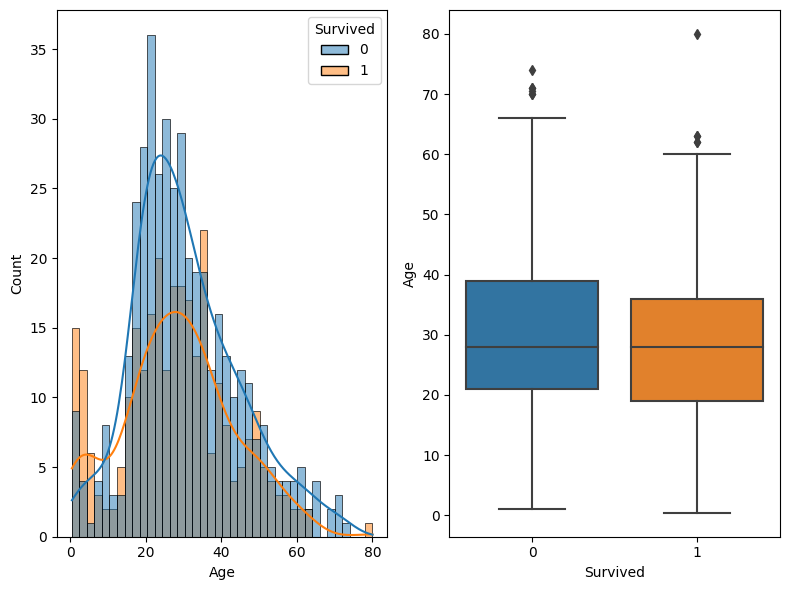

In [16]:
fig,ax = plt.subplots(1,2,figsize=(8,6))
sns.histplot(data=train_df,x='Age',hue='Survived',bins = 40,kde = True,ax = ax[0])
sns.boxplot(data=train_df,x='Survived',y='Age',ax=ax[1])
plt.tight_layout()

**Nhận xét:**
* Độ tuổi từ 18-50 có tỉ lệ tử vong cao nhất
* Một số người già (80 tuổi) sống sót
* nhìn chung: cơ hội sống sót của người trẻ > người già

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

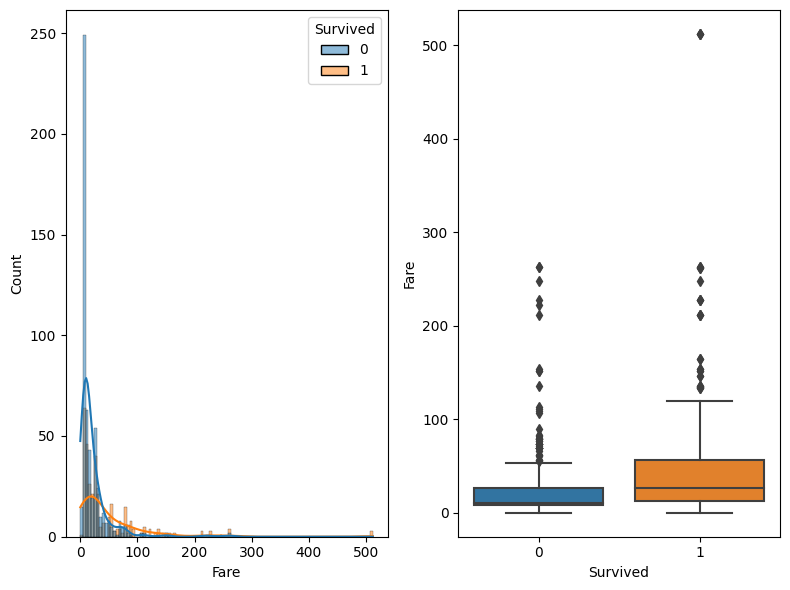

In [17]:
fig,ax = plt.subplots(1,2,figsize=(8,6))
sns.histplot(data=train_df,x='Fare',hue='Survived',kde = True,ax = ax[0])
sns.boxplot(data=train_df,x='Survived',y='Fare',ax=ax[1])
plt.tight_layout()

In [18]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Fare', ylabel='count'>

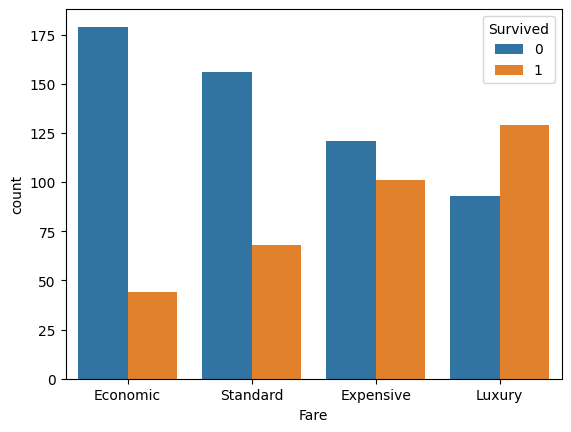

In [19]:
# cắt dữ liệu theo quartile
fare_category = ['Economic', 'Standard','Expensive','Luxury']

quartile_fare = pd.qcut(train_df['Fare'],4,labels = fare_category)

sns.countplot(x=quartile_fare,hue='Survived',data=train_df)

* **Phân phối của Fare** bị lệch trái, có 75% giá vé < 31.00$
* **Giá vé expensive và Luxury** có tỉ lệ sống sót cao hơn -> tương ứng với class 1st


#  **Feature Engineering & Data Wrangling**

In [20]:
# trích title từ name.
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Do Mr, Miss, Mrs, Master chiếm phần lớn dữ liệu nên sẽ gộp các title còn lại thành **Others**


In [21]:
def group_title(title):
  if title in ['Mr','Miss','Mrs','Master']:
    return title
  else:
    return 'Others'
train_df['Title'] = train_df['Title'].apply(group_title)

<Axes: xlabel='Title', ylabel='count'>

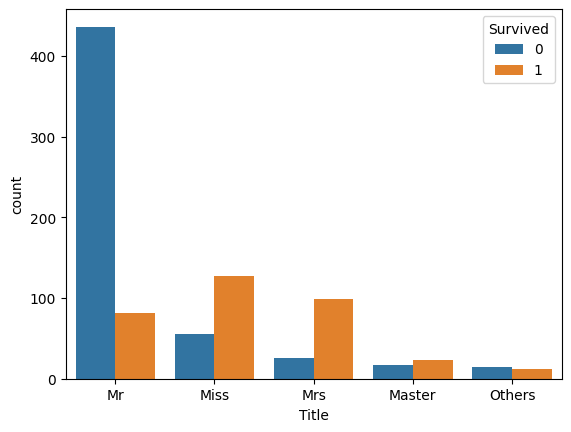

In [22]:
sns.countplot(data=train_df,x='Title',hue='Survived',order = train_df['Title'].value_counts().index)

* Tỉ lệ non Survived của Mr cao nhất và lớn hơn nhiều với Survived
* Tỉ lệ sống sót của Miss, Mrs, Master cao hơn 
* tỉ lệ sống sót của others thấp hơn

In [23]:
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
test_df['Title'].value_counts()
test_df['Title'].apply(group_title)

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306    Others
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 418, dtype: object

**FAMILY:** SibSp, Parch

In [24]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [25]:
train_df['Family_size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_size, Length: 891, dtype: int64

In [26]:
train_df['Family_cat'] = pd.cut(train_df['Family_size'],bins=(0,1,4,6,20), labels = ['Single', 'Small', 'Medium','Large'])
test_df['Family_cat'] = pd.cut(test_df['Family_size'],bins=(0,1,4,6,20), labels = ['Single', 'Small', 'Medium','Large'])

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Family_cat', ylabel='count'>

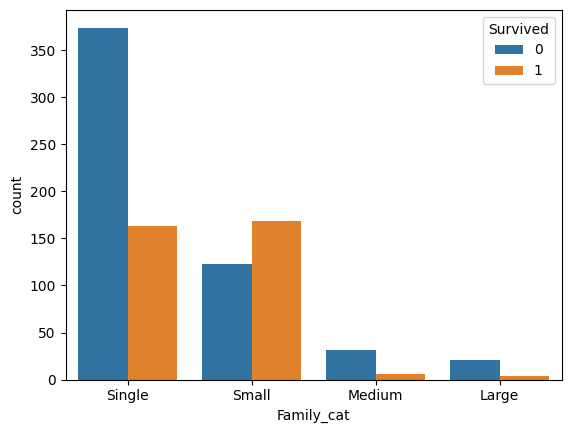

In [27]:
sns.countplot(data=train_df,x='Family_cat',hue='Survived')

**FILL MiSSING VALUE**

In [28]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_cat']
features = num_features + cat_features
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age         714 non-null    float64 
 1   Fare        891 non-null    float64 
 2   Sex         891 non-null    category
 3   Pclass      891 non-null    category
 4   Embarked    889 non-null    category
 5   Title       891 non-null    object  
 6   Family_cat  891 non-null    category
dtypes: category(4), float64(2), object(1)
memory usage: 31.9+ KB


In [29]:
def display_missing(df,feature_cols):
  total = df.shape[0]
  for col in feature_cols:
    num_missing = df[col].isnull().sum()
    ratio = num_missing/total
    if ratio > 0:
      print(f'{col} has {ratio*100:.2f}% missing value')
print('Train dataset:')
display_missing(train_df,features)
print('Test dataset:')
display_missing(test_df,features)


Train dataset:
Age has 19.87% missing value
Embarked has 0.22% missing value
Test dataset:
Age has 20.57% missing value
Fare has 0.24% missing value


In [30]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass'])['Age'].median()
age_by_sex_pclass

/tmp/ipykernel_31/2309511452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex','Pclass'])['Age'].median()


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [31]:
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

/tmp/ipykernel_31/3934188762.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [32]:
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

/tmp/ipykernel_31/81069533.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [33]:
display_missing(train_df,features)
display_missing(test_df,features)

Embarked has 0.22% missing value
Fare has 0.24% missing value


In [34]:
X = train_df[features]
y = train_df['Survived']

In [35]:
X_test = test_df[features]

In [36]:
#preprocess pipeline
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


In [37]:
preprocesser = ColumnTransformer(transformers = [
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [38]:
preprocesser.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [39]:
X = preprocesser.transform(X)
X_test = preprocesser.transform(X_test)

# MODEL TRAINING

In [40]:
# Split train -> train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

# BASELINE MODEL PIPELINE

In [41]:
!pip install xgboost

In [42]:

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
seed = 42
models = [
  LinearSVC(random_state=seed),
  SVC(random_state=seed),
  LogisticRegression(solver='liblinear',random_state=seed,max_iter=1000),
  KNeighborsClassifier(),
  DecisionTreeClassifier(random_state=seed),
  RandomForestClassifier(random_state=seed),
  AdaBoostClassifier(random_state=seed),
  ExtraTreesClassifier(random_state=seed),
  XGBClassifier(random_state=seed,use_label_encoder=False,eval_metric='logloss')
]

In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold,learning_curve
def baseline_model_evaluation(models,X,y,metrics,cv=5):
  kFold = StratifiedKFold(cv,shuffle=True,random_state=seed)
  entries = []
  for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,X,y,scoring=metrics,cv=kFold)
    for fold_idx, accuracy in enumerate(accuracies):
      entries.append((model_name,fold_idx,accuracy))
  cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])
  means = cv_df.groupby('model_name')['accuracy'].mean()
  std =   cv_df.groupby('model_name')['accuracy'].std()
  baseline_means = pd.concat([means,std],axis=1,ignore_index=True)
  baseline_means.columns = ['mean_accuracy','std_accuracy']
  baseline_means.sort_values('mean_accuracy',ascending=False,inplace=True)
  return baseline_means

baseline_model_evaluation(models,X,y,'accuracy')

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,mean_accuracy,std_accuracy
model_name,,
SVC,0.831643,0.009035
LogisticRegression,0.829396,0.009598
LinearSVC,0.828272,0.009624
XGBClassifier,0.828259,0.022873
AdaBoostClassifier,0.819302,0.014016
KNeighborsClassifier,0.818172,0.020966
DecisionTreeClassifier,0.813653,0.029014
RandomForestClassifier,0.811468,0.014818
ExtraTreesClassifier,0.802467,0.010846


# Hyperparameters

In [48]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method = "hist",
    device = "cuda",  
    random_state=seed
)

# Lưới tham số cho GridSearch
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [3, 5, 7,9],
    'learning_rate': [0.01, 0.1,0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
}


# GridSearchCV với cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [04:39:22] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [04:39:22] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.9s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_ra...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [49]:
# Hiển thị các tham số tối ưu
print("Best parameters found: ", grid_search.best_params_)

# Hiển thị điểm số của mô hình tốt nhất
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

# Lấy mô hình tốt nhất từ GridSearchCV
best_xgb = grid_search.best_estimator_

y_train_pred = best_xgb.predict(X_train)
y_val_pred = best_xgb.predict(X_val)

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Val accuracy:", accuracy_score(y_val, y_val_pred))

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best cross-validation score: 0.839880
Train accuracy: 0.9058988764044944
Val accuracy: 0.8547486033519553


In [ ]:
#save model
import pickle
import os
folder = '/kaggle/working/model'
if not os.path.exists(folder):
  os.makedirs(folder)
# Lưu mô hình:
with open(f'{folder}/svc_model.pkl', 'wb') as file:
  pickle.dump(best_xgb,file)

y_pred = best_xgb.predict(X_test)
#create submission
submission = pd.DataFrame({'PassengerId':test_df.index,'Survived':y_pred})
submission.to_csv(f'/kaggle/working/submission.csv',index=False)